In [34]:
using Cropbox
using PotatoModel

In [28]:
using CSV
using DataFrames
using TimeZones

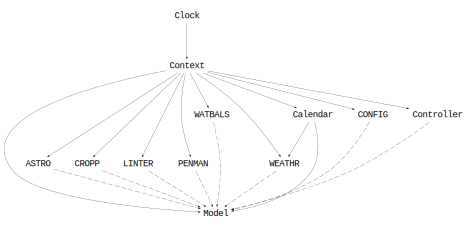

In [30]:
Cropbox.hierarchy(PotatoModel.Model)

In [35]:
CSV.read("./test/WAGE71.csv", DataFrame)

,DATE (:Date),YEAR,DAY,DTR (J/m^2/d),TMIN (°C),TMAX (°C),VAP (mbar),WIND (m/s)
,Date,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,1971-01-01,1971,1,1.13e6,-12.2,0.6,3.73,2.2
2,1971-01-02,1971,2,2.135e6,-9.0,1.6,6.66,2.2
3,1971-01-03,1971,3,963000.0,-3.3,-0.2,5.85,1.7
4,1971-01-04,1971,4,1.214e6,-6.5,-4.4,3.99,1.5
5,1971-01-05,1971,5,2.554e6,-10.8,-5.3,2.9,1.2
6,1971-01-06,1971,6,3.559e6,-11.3,0.4,2.77,2.7
7,1971-01-07,1971,7,1.926e6,-10.6,4.9,6.81,4.7
8,1971-01-08,1971,8,670000.0,0.3,4.9,8.13,2.7
9,1971-01-09,1971,9,1.926e6,-0.8,4.0,6.96,2.3


In [31]:
config = @config(
            :Calendar => :init => ZonedDateTime(1971, 4, 15, tz"UTC"),
            :Clock => :step => 1u"d",
            :WEATHR => :W => CSV.read("./test/WAGE71.csv", DataFrame),
            :CONFIG => (; 
                IDPL = 105,
                FINT0 = 0.0139,
                R0 = 0.0250,
                DURE = 325,
                TS50 = 1250,
                HIM = 0.88,
                HISLP = 0.0030,
                STTUB = 170,
                DMSO = 0.21,
                TBASE = 2,
                IDAYL = 0,
                DAYMAX = 20,
                DAYMIN = 10,
                TSUMEM = 285,
                NPL = 4,
                SMW = 0.1,
                SMFC = 0.4,
                SM0 = 0.45,
                RDMCR = 50,
                RDMSO = 150,
                RUNFR = 0,
                CFET  = 1.15,
                CFEV = 2.0
            )
        )

init,=,"ZonedDateTime(1971, 4, 15, tz""UTC"")"
step,=,1 d
W,=,365×9 DataFrame…
IDPL,=,105
FINT0,=,0.0139
R0,=,0.025
DURE,=,325
TS50,=,1250
HIM,=,0.88
HISLP,=,0.003
STTUB,=,170


In [33]:
?PotatoModel.WATBALS

This system simulates the soil water status in the maximum effective         rooted zone. It takes into account soil surface evaporation, crop transpiration, precipitation, surface runoff, irrigation, and drainage to the sub-soil.    

  * `RDM`: Maximum rooting depth
  * `WAVTI`: Initial total available water in maximum rooted zone
  * `WAVFC`: Available water at field capacity
  * `SMACTI`: Initial actual soil moisture content
  * `SMACT`: Actual soil moisture content
  * `RIRR`: Irrigation
  * `PERC`: Percolation
  * `RUNOF`: Water loss by surface runoff
  * `TRMAX`: Maximum transpiration rate
  * `TRA`: Actual transpiration
  * `EVMAX`: Maximum soil evaporation rate as function of light interception
  * `EVA`: Actual soil evaporation rate
  * `PERC1`: Effective percolation
  * `CAP`: Water holding capacity of maximum rooted zone
  * `DRAIN`: Drainage
  * `DIRR`: Daily demand for irrigation water
  * `DWAT`: Change in total water and available water
  * `TDRAIN`: Cumulative drainage
  * `TRAIN`: Cumulative precipitation
  * `TRUNOF`: Cumulative surface runoff
  * `TIRR`: Cumulative irrigation
  * `TESOIL`: Cumulative soil evaporation
  * `TTRANS`: Cumulative crop transpiration
  * `WTOT`: Total water in maximum rooted zone
  * `WAVT`: Total available water in maximum rooted zone
  * `SMW`: Soil moisture content at wilting point (pF= 4.2) (CONFIG)
  * `SMFC`: Soil moisture content at field capacity (pF= 2.3) (CONFIG))
  * `SM0`: Soil moisture content at saturation (from CONFIG)
  * `SMI`: Initial soil moisture content at planting or emergence (CONFIG)
  * `RDMCR`: Maximum rooting depth for potato crop (CONFIG)
  * `RDMSO`: Maximum rooting depth determined by soil structure and layers (CONFIG)
  * `RUNFR`: Average fraction of precipitation lost by runoff (CONFIG)
  * `CFET`: Crop-specific correction factor of potential transpiration (CONFIG)
  * `CFEV`: Correction factor of time course of soil evaporation (between 1 and 4) (CONFIG)
  * `ES0`: Potential evaporation from soil surface
  * `ETC`: Corrected potential evapo-transpiration (PENMAN)
  * `RAIN`: Precipitation (WEATHR)
  * `FINT`: Fractional light interception of canopy (LINTER)


In [19]:
 r = simulate(PotatoModel.Model; config, stop = 134u"d", target=[
        "IDAY",
        "WTU",
        "TAGB",
        "SMACT",
        "TRAIN",
        "TIRR",
        "TTRANS",
        "TESOIL",
        "TDRAIN",
        "TRUNOF",
        "WTOT",
        "WAVT",
        "TPARINT",
        "TPAR"
        ]
    );

In [20]:
last(r, 20)

,time,IDAY,WTU,TAGB,SMACT,TRAIN,TIRR
,Quantity…,Int64,Quantity…,Quantity…,Float64,Quantity…,Quantity…
1,2760.0 hr,220,14340.0 kg ha^-1,17921.6 kg ha^-1,0.273535,24.06 cm,5.0 cm
2,2784.0 hr,221,14560.0 kg ha^-1,18129.9 kg ha^-1,0.267143,24.06 cm,5.0 cm
3,2808.0 hr,222,14698.0 kg ha^-1,18237.4 kg ha^-1,0.263993,24.06 cm,5.0 cm
4,2832.0 hr,223,14855.8 kg ha^-1,18383.1 kg ha^-1,0.259226,24.12 cm,5.0 cm
5,2856.0 hr,224,14944.8 kg ha^-1,18432.8 kg ha^-1,0.256598,24.19 cm,5.0 cm
6,2880.0 hr,225,15058.9 kg ha^-1,18515.4 kg ha^-1,0.256728,24.4 cm,5.0 cm
7,2904.0 hr,226,15165.1 kg ha^-1,18589.9 kg ha^-1,0.255787,24.55 cm,5.0 cm
8,2928.0 hr,227,15282.8 kg ha^-1,18682.1 kg ha^-1,0.258732,24.96 cm,5.0 cm
9,2952.0 hr,228,15380.9 kg ha^-1,18749.8 kg ha^-1,0.257393,25.08 cm,5.0 cm


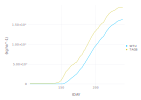

In [8]:
visualize(r, :IDAY, [:WTU, :TAGB], kind=:line)